# **Kevin Chandra**

#### **FGA - DTS Unhas Artificial Intelligence Batch 2**

## **Final Project**

# **TF-IDF (Term Frequency - Inverse Document Frequency)**

**TF - IDF** yang merupakan singkatan dari **Term Frequency - Inverse Document Frequency** adalah metode statistik numerikal yang berfungsi untuk mengetahui pentingnya suatu kata terhadap dokumen dalam sebuah collection atau corpus. Algoritma ini sering digunakan sebagai pembobot dalam pencarian informasi, text mining dan user modelling.

Ragam dari skema pembobotan dari TF - IDF sering digunakan oleh mesin pencari sebagai alat utama dalam penilaian dan pemeringkatan dokumen yang sesuai dengan permintaan pengguna. TF - IDF dapat digunakan dengan baik pada penyaringan stop-words di berbagai bidang, termasuk text summarization dan klasifikasi.

#### **TF ( Term Frequency )**

Term Frequency adalah frekuensi kemunculan sebuah term atau kata dalam dokumen yang bersangkutan. Semakin besar jumlah kemunculan suatu term dalam dsebuah dokumen, maka semakin besar bobot kesesuaian yang akan diberikan.

Terdapat beberapa skema pembobotan pada TF (Term Frequency), yaitu :
- **TF Biner (Binary TF)** merupakan pembobotan yang bernilai 1 jika term atau kata ditemukan di dalam dokumen, dan bernilai 0 jika term atau kata tidak ditemukan di dalam dokumen.

- **TF Murni (Raw TF)** merupakan pembobotan berdasarkan jumlah kemunculan suatu term pada dokumen. Misalkan jika ada 10 kali suatu kata muncul pada dokumen, maka nilainya adalah 10.

- **TF Logaritmik (Log Normalization)** merupakan pembobotan dengan menggunakan fungsi logaritma yaitu :

<img src="TF Logaritmik.png" style="width:300px"/>

- **TF Normalisasi** merupakan pembobotan dengan menggunakan perbandingan antara frekuensi suatu term dengan nilai maksimum dari keseluruhan atau kumpulan frekuensi term yang ada pada suatu dokumen

<img src="TF Normalisasi.png" style="width:300px"/>

#### **IDF ( Inverse Document Frequency )**

Inverse Document Frequency adalah perhitungan seberapa banyak informasi yang diberikan oleh suatu kata misalnya seperti seberapa sering atau jarang kata tersebut ditemukan pada suatu dokumen. Perhitungan IDF menggunakan skala logaritmik seperti pada rumus di bawah :

<img src="IDF.png" style="width:300px"/>

Dimana nilai idf sama dengan nilai logaritma dari pembagian jumlah dokumen (N) atas jumlah dokumen yang terdapat term (kata) yang dimaksud.

#### **TF - IDF**

Setelah menghitung nilai tf dan idf dari suatu term, maka untuk menghitung nilai tf-idf nya adalah :

<img src="TF - IDF.png" style="width:350px"/>

Nilai tf-idf yang tinggi dapat diperoleh jika nilai tf (jumlah kata yang ditemukan pada suatu dokumen) bernilai besar dan nilai idf yang besar(term ditemukan pada sedikit dokumen)

## **Studi Kasus**

Dalam project ini, akan didemokan penggunaan tf-idf untuk mengubah data training menjadi vektor yang kemudian ditraining menggunakan algoritma Multi Layer Perceptron (Neural Network) untuk proses klasifikasi sentimen.

Input : Pada project ini, input data yang dimiliki berupa teks baik dalam bentuk kalimat maupun paragraf.

Output : Setelah input diberikan, maka model nantinya akan menentukan atau menglasifikasikan input tersebut ke dalam salah satu dari kelas **Positif** atau **Negatif**.

## **1. Mengunduh Dataset**

Dataset yang digunakan adalah dataset **Large Movie Review** yang merupakan dataset klasifikasi sentimen biner yang menyediakan 25,000 data review sebuah film untuk training dan 25,000 untuk testing. Dataset tersedia pada : http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

Setelah file didownload, maka perlu di-extract terlebih dahulu dan ditempatkan pada folder yang sama dengan file ini.

## **2. Memuat Module yang Dibutuhkan**

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

## **3. Mengeksplor Dataset**

Untuk memulai mengeksplor data, terlebih dahulu kita perlu memuat dataset.

In [2]:
X_train = []
y_train = []
X_test = []
y_test = []

In [3]:
# Load the dataset
for dataset in ['train', 'test']:
    for category in ['pos', 'neg']:
        dataset_path = os.path.join('aclImdb', dataset, category)
        for fname in sorted(os.listdir(dataset_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(dataset_path, fname), encoding='utf8') as f:
                    if dataset == 'train': X_train.append(f.read())
                    else: X_test.append(f.read())
                label = 0 if category == 'neg' else 1
                if dataset == 'train': y_train.append(label)
                else: y_test.append(label)

In [4]:
# Converting to np.array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [5]:
def shuffle(X, y):
    perm = np.random.permutation(len(X))
    X = X[perm]
    y = y[perm]
    return X, y

In [6]:
# Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

Setelah memuat data menjadi data training dan data testing, selanjutnya perlu diketahui ukuran dari data training dan data testing yang diperoleh.

In [7]:
print ('Train samples shape :', X_train.shape)
print ('Train labels shape  :', y_train.shape)
print ('Test samples shape  :', X_test.shape)
print ('Test labels shape   :', y_test.shape)

Train samples shape : (24321,)
Train labels shape  : (24321,)
Test samples shape  : (25000,)
Test labels shape   : (25000,)


Untuk mengetahui banyak kelas atau kategori label dan mengetahui penyebaran data, dilakukan seperti berikut :

In [8]:
uniq_class_arr, counts = np.unique(y_train, return_counts=True)

print ('Unique classes :', uniq_class_arr)
print ('Number of unique classes : ', len(uniq_class_arr))

for _class in uniq_class_arr:
    print ('Counts for class ', uniq_class_arr[_class], ' : ', counts[_class])

Unique classes : [0 1]
Number of unique classes :  2
Counts for class  0  :  12500
Counts for class  1  :  11821


Setelah memuat dataset yang akan digunakan dan membaginya ke dalam data training dan data testing, maka kita akan mengecek beberapa data yang dimiliki.

In [9]:
size_of_samp = 5
rand_samples_to_check = np.random.randint(len(X_train), size=size_of_samp)

for sample_num in rand_samples_to_check:
    print ('============================================================')
    print (X_train[sample_num], '|| Label : ', y_train[sample_num])
    print ('============================================================')


The original was a good movie. I bought it on tape and have watched it several times. And though I know that sequels are not usually as good as the original I certainly wasn't expecting such a bomb. The romance was flat, the sight gags old, the spoken humor just wasn't. This may not have been the worst movie I've ever seen but it comes close. || Label :  0
The movie within the movie - a concept done many times in the history of cinema. It is accomplished here as well as in any.<br /><br />If you love Carmen, you'll love this version.<br /><br />If you love flamenco, you'll love this version.<br /><br />The plot of the classic opera is played out in the actual rehearsal of the opera by a flamenco troupe. The music is authentic. The direction wonderful.<br /><br />If you like dancing, you'll love this version.<br /><br />There is tragedy. There is passion. There is intrigue.<br /><br />There is...<br /><br />Carmen. || Label :  1
I saw this recently on a faded old VHS tape, and remembere

## **4. Menggambarkan Data**

Pertama-tama kita akan menggambarkan bagaimana penyebaran banyaknya karakter per sample yang dimiliki setiap sample-nya.

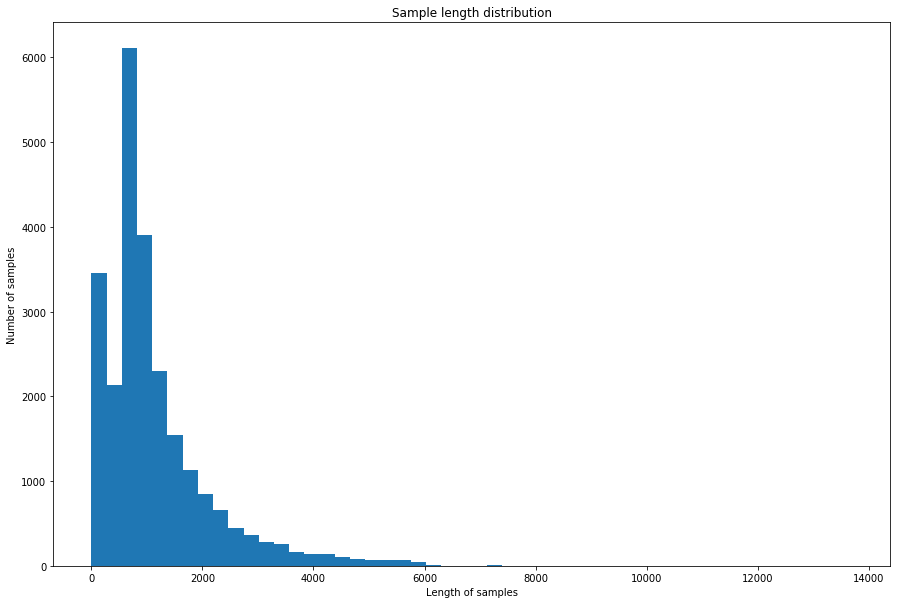

In [10]:
plt.figure(figsize=(15, 10))
plt.hist([len(sample) for sample in list(X_train)], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

Disini dapat diamati bahwa mayoritas sample memiliki 0 hingga 1000 karakter untuk setiap sample-nya. Selain itu, akan digambarkan beberapa kata yang sering muncul pada data training yang dimiliki.

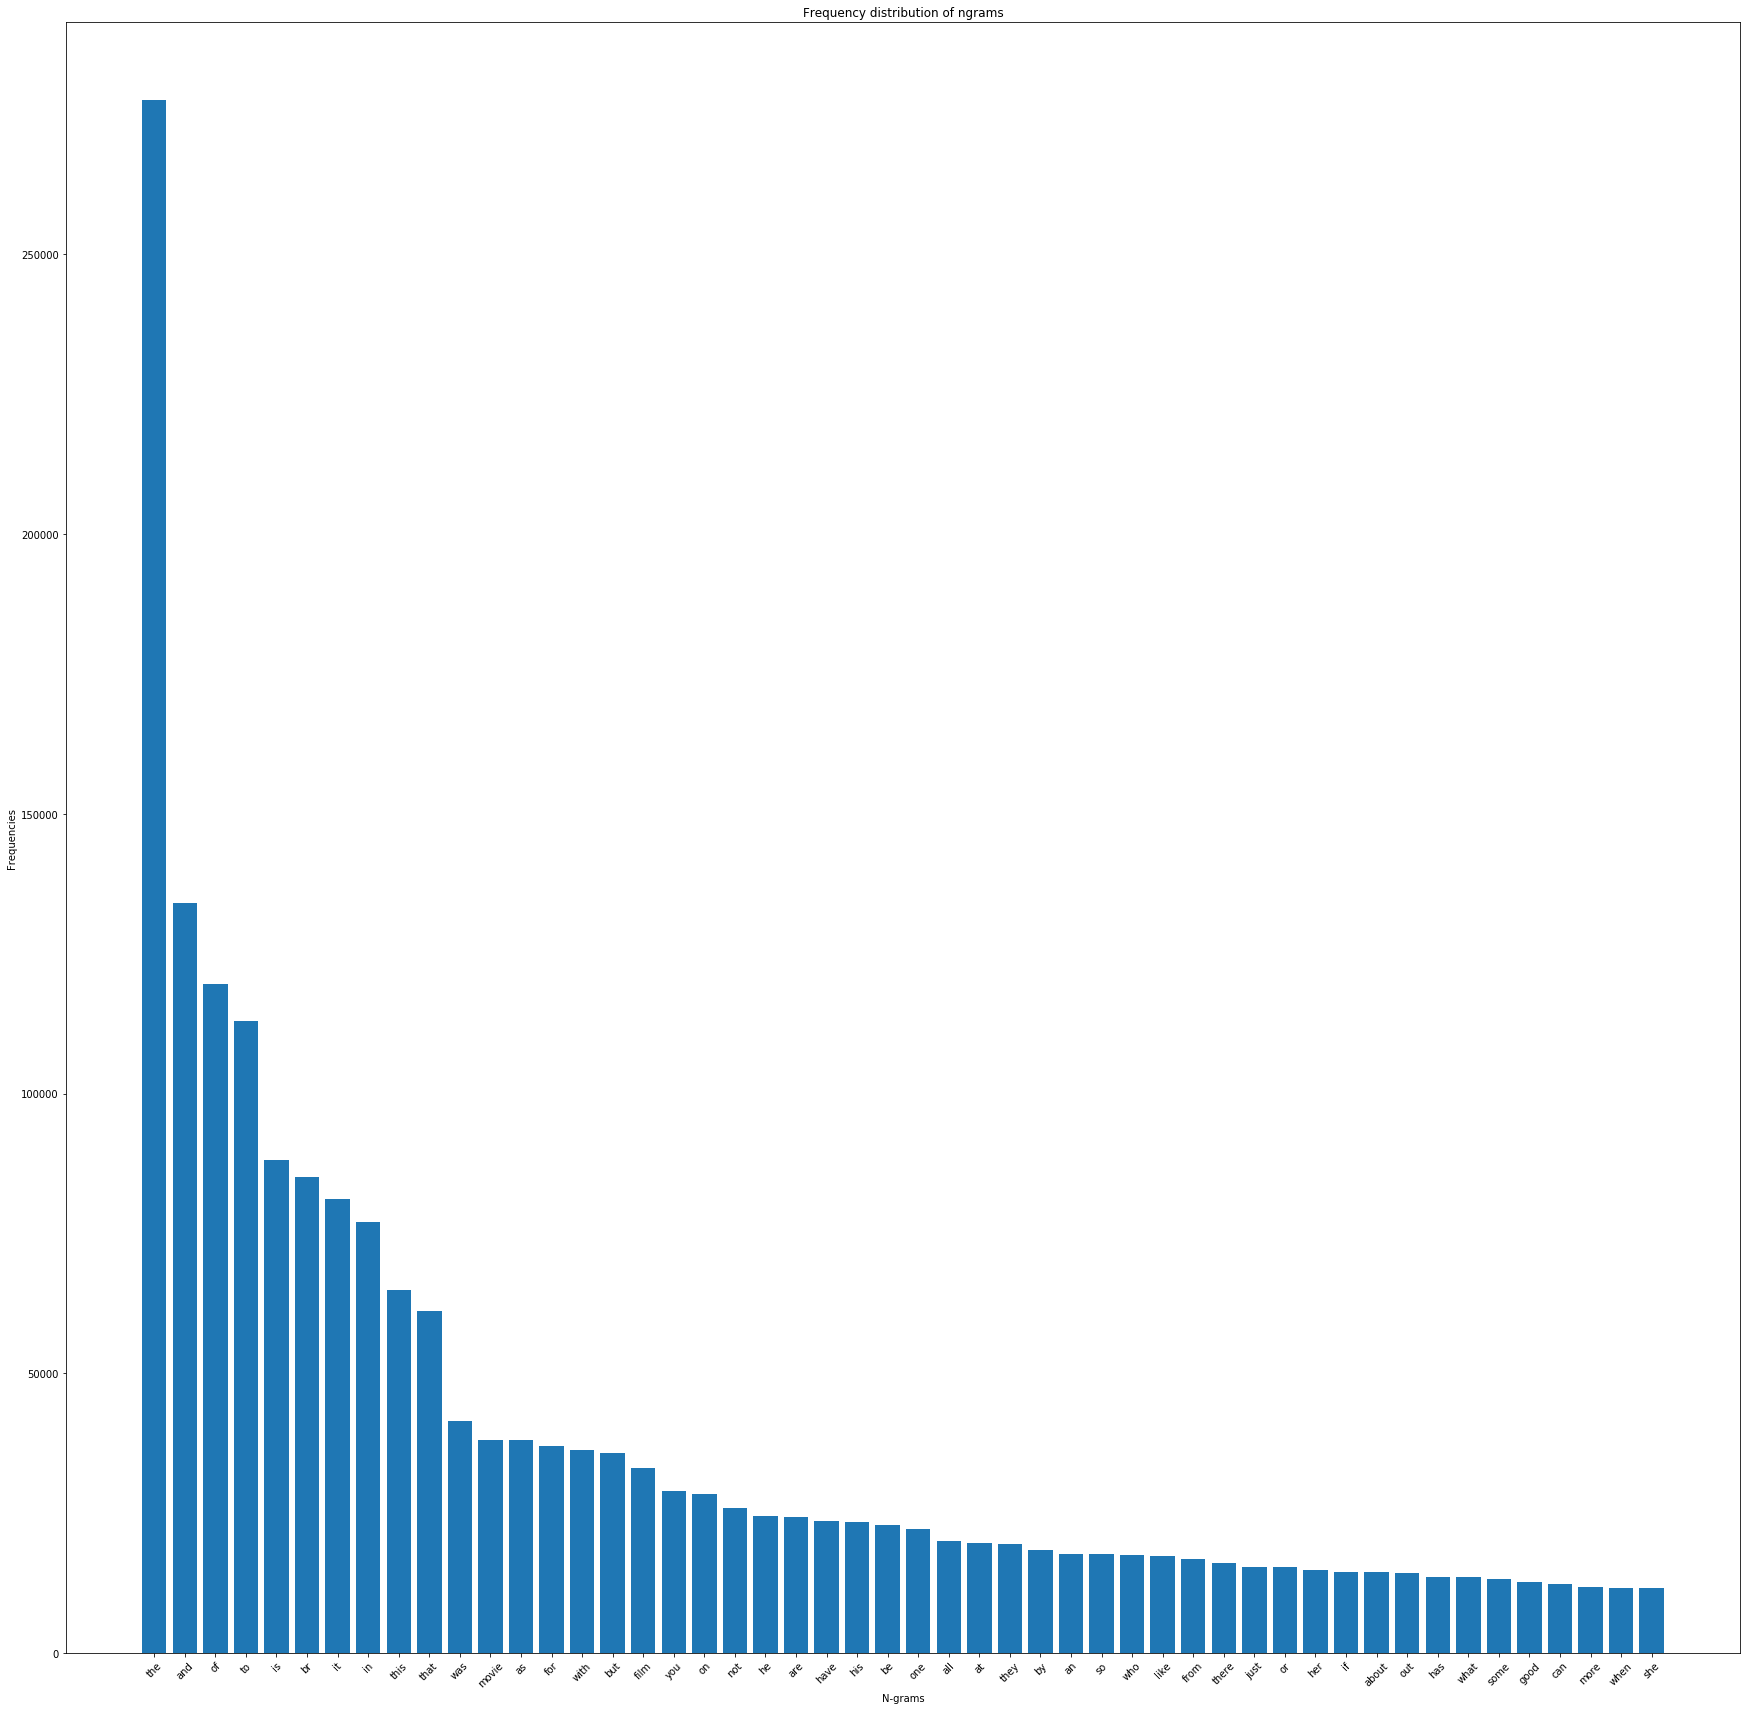

In [11]:
kwargs = {
    'ngram_range' : (1, 1),
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : 'word'
}

vectorizer = CountVectorizer(**kwargs)
vect_texts = vectorizer.fit_transform(list(X_train))
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

## **5. Preprocessing Data**

Data yang telah dimiliki kemudian di olah kembali sehingga dapat lebih mudah dimengerti oleh sistem. Data text yang terdiri baik berbentuk kalimat maupun paragraf kemudian diubah ke dalam bentuk vektor. Proses pengubahan ini menggunakan algoritma **TF-IDF** yang kemudian dipilih beberapa fitur terbaik yang dimiliki setiap data (baik kalimat maupun paragraf).

In [12]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

kwargs = {
    'ngram_range' : NGRAM_RANGE,
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : TOKEN_MODE,
    'min_df' : MIN_DOC_FREQ,
}

# Learn Vocab from train texts and vectorize train and test sets
tfidf_vectorizer = TfidfVectorizer(**kwargs)

x_train = tfidf_vectorizer.fit_transform(X_train)
x_test = tfidf_vectorizer.transform(X_test)

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


In [13]:
TOP_K = 20000

# Select best k features, with feature importance measured by f_classif
selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))

selector.fit(x_train, y_train)

X_train = selector.transform(x_train).astype('float32')
X_test = selector.transform(x_test).astype('float32')

## **6. Membuat Model Penglasifikasi**

Selanjutnya akan dibuat sebuah model penglasifikasi yang nantinya akan dapat menglasifikasikan sebuah kalimat atau paragraf ke dalam sentimen positif ataupun negatif. Model yang akan dibuat menggunakan algoritma Neural Network yang terdiri dari 1 hidden layer dan 1 output layer.

In [14]:
dropout_rate = 0.2               # nilai untuk menghidari overfit pada data train
input_shape = X_train.shape[1:]  # (20000,)
layers = 2                       # 1 hidden layer dan 1 output layer
units = 64                       # 64 unit di hidden layer
last_units = 1                   # 1 unit di output layer
activation = 'sigmoid'           # sigmoid mengembalikan nilai di range [0,1]

model = models.Sequential()

model.add(Dropout(rate=dropout_rate, input_shape=input_shape))

for _ in range(layers-1):
    model.add(Dense(units=units, activation='relu'))
    model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=last_units, activation=activation))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Setelah menyelesaikan arsitektur model yang ingin dibangun, dilanjutkan dengan menentukan rumus perhitungan loss yang akan digunakan, nilai learning rate yang akan digunakan dan juga algoritma optimizer yang digunakan. Dalam hal ini, akan digunakan rumus loss yaitu **Binary Cross Entropy** dengan perhitungan sebagai berikut : 

<img src="Binary Cross Entropy Loss Function.png" style="width:300px"/>

Atau sebagai contoh sebagai berikut : 

<img src="Loss Function Diagram.png" style="width:500px"/>

In [15]:
loss = 'binary_crossentropy'
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Selanjutnya menambahkan callback yang berfungsi untuk menghentikan proses training. Disini, callback diatur supaya proses training berhenti apabila loss pada data validasi(test) tidak mengalami penurunan setelah 2 epoch.

In [16]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]

Selanjutnya menentukan nilai epoch yang berarti banyaknya perulangan yang akan terjadi selama proses training berlangsung, dan nilai ukuran batch yang menentukan banyaknya data yang digunakan untuk setiap epoch. Kemudian dilakukan proses training dengan memanggil function fit.

In [17]:
epochs = 1000
batch_size = 128

# Train and validate model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
                    verbose=2, batch_size=batch_size, callbacks=callbacks)

Train on 24321 samples, validate on 25000 samples
Epoch 1/1000
24321/24321 - 8s - loss: 0.4997 - acc: 0.7940 - val_loss: 0.3777 - val_acc: 0.8536
Epoch 2/1000
24321/24321 - 7s - loss: 0.2424 - acc: 0.9183 - val_loss: 0.3096 - val_acc: 0.8692
Epoch 3/1000
24321/24321 - 8s - loss: 0.1690 - acc: 0.9419 - val_loss: 0.2795 - val_acc: 0.8823
Epoch 4/1000
24321/24321 - 8s - loss: 0.1314 - acc: 0.9561 - val_loss: 0.2702 - val_acc: 0.8854
Epoch 5/1000
24321/24321 - 9s - loss: 0.1053 - acc: 0.9677 - val_loss: 0.2797 - val_acc: 0.8836
Epoch 6/1000
24321/24321 - 8s - loss: 0.0891 - acc: 0.9722 - val_loss: 0.2857 - val_acc: 0.8823


## **7. Evaluasi Model**

Setelah proses training berhasil, maka akan ditampilkan akurasi yang diperoleh dan loss yang didapatkan apabila model digunakan pada data validasi.

In [18]:
# Print results
history = history.history
val_acc = history['val_acc'][-1]
val_loss = history['val_loss'][-1]
print ('Validation accuracy: {acc}\nLoss: {loss}'.format(
        acc=val_acc, loss=val_loss))

Validation accuracy: 0.8822799921035767
Loss: 0.28574037791728973


## **8. Mencoba Model**

Pertama- tama, akan dibuat sebuah function untuk dapat memudakan proses prediksi seperti ini.

In [31]:
def predict(test_str) :
    str_ = tfidf_vectorizer.transform([test_str])
    test_str = selector.transform(str_).astype('float32')
    if model.predict(test_str) >= 0.5 : 
        return "Positif"
    else :
        return "Negatif"

Selanjutnya model dapat dicoba terhadap kalimat yang ingin diuji.

In [29]:
new_test = "I really like the movie."
predict(new_test)

'Positif'

In [30]:
new_test = "The movie is really bad."
predict(new_test)

'Negatif'

## **Referensi**

[1] https://informatikalogi.com/term-weighting-tf-idf/

[2] https://developers.google.com/machine-learning/guides/text-classification/step-3

[3] https://www.kaggle.com/iarunava/google-text-classification-notebook

Dataset :
http://ai.stanford.edu/~amaas/data/sentiment/